In [12]:
import keras

In [13]:
from keras.datasets import mnist

In [14]:
train_X=mnist.load_data()[0][0][:6400]

In [15]:
train_Y=mnist.load_data()[0][1][:6400]

In [16]:
valid_X = mnist.load_data()[1][0][:1600].astype('float32')
valid_Y = mnist.load_data()[1][1][:1600]

In [17]:
test_X = mnist.load_data()[1][0][-2000:].astype('float32')
test_Y = mnist.load_data()[1][1][-2000:]

In [18]:
print('train_X:', train_X.shape, end = '')
print(', train_Y:', train_Y.shape)
print('valid_X:', valid_X.shape, end = '')
print(', valid_Y:', valid_Y.shape)
print('test_X:', test_X.shape, end = '')
print(', test_Y:', test_Y.shape)

train_X: (6400, 28, 28), train_Y: (6400,)
valid_X: (1600, 28, 28), valid_Y: (1600,)
test_X: (2000, 28, 28), test_Y: (2000,)


In [19]:
import matplotlib.pyplot as graph

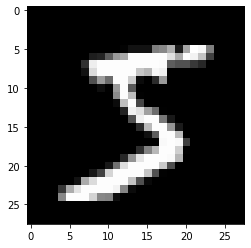

In [20]:
graph.imshow(train_X[0], cmap = 'gray', interpolation = 'nearest')

In [21]:
dim = train_X[0].shape[0]

In [23]:
train_X = train_X.reshape(train_X.shape[0], dim, dim, 1)
valid_X = valid_X.reshape(valid_X.shape[0], dim, dim, 1)
test_X = test_X.reshape(test_X.shape[0], dim, dim, 1)

In [24]:
train_X = train_X /255
valid_X = valid_X /255
test_X = test_X /255

In [25]:
print(train_Y[0])

5


In [26]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

In [27]:
print(train_Y[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [28]:
import keras

In [29]:
model=keras.models.Sequential()

In [30]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

In [31]:
model.add(Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (dim, dim, 1)))
model.add(Conv2D(56, (3, 3), activation = 'relu'))

In [32]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [33]:
model.add(Dropout(0.12))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(128, activation='relu'))

In [37]:
model.add(Dropout(0.25))


In [39]:
import tensorflow as tf

In [40]:
model.add(Dense(10, activation=tf.nn.softmax))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [42]:
training_stats = model.fit(train_X,train_Y,batch_size = 128, epochs = 12, verbose = 1, validation_data = (valid_X, valid_Y))

Train on 6400 samples, validate on 1600 samples
Epoch 1/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.7094 - accuracy: 0.7897 - val_loss: 0.4247 - val_accuracy: 0.8594
Epoch 2/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.2722 - accuracy: 0.9225 - val_loss: 0.2626 - val_accuracy: 0.9212
Epoch 3/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.1753 - accuracy: 0.9506 - val_loss: 0.1846 - val_accuracy: 0.9425
Epoch 4/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.1201 - accuracy: 0.9634 - val_loss: 0.1593 - val_accuracy: 0.9488
Epoch 5/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.0913 - accuracy: 0.9733 - val_loss: 0.1352 - val_accuracy: 0.9556
Epoch 6/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.0708 - accuracy: 0.9798 - val_loss: 0.1238 - val_accuracy: 0.9619
Epoch 7/12
6400/6400 [==============================] - 14s 2ms/step - loss: 0.058

In [43]:
evaluation = model.evaluate(test_X, test_Y, verbose=0)

In [44]:
evaluation

[0.0646413694290386, 0.9810000061988831]

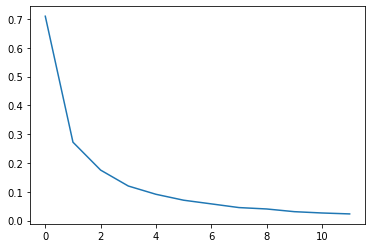

In [45]:
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')


In [47]:
import numpy as np

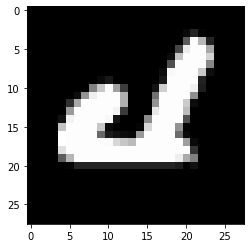

prediction: 4


In [48]:
sample = test_X[0].reshape(dim, dim)
graph.imshow(sample, cmap = 'gray', interpolation = 'nearest')
graph.show()

prediction = model.predict(sample.reshape(1, dim, dim, 1))
print('prediction: %i' %(np.argmax(prediction)))